<a href="https://colab.research.google.com/github/jsb616/AIStudy25/blob/master/05_03_%ED%8A%B8%EB%A6%AC%EC%9D%98%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 지금까지 k-최근접 이웃 알고리즘, 선형회귀, 릿지, 라쏘, 다항회귀, 로지스틱회귀 등을 배웠고
# 확률적 경사 하강법을 이용한 분류와 결정트리 모델까지 학습함

# 테스트 세트 말고 검증 세트를 사용하는 cv(교차 검증), 하이퍼파라미터 튜닝 등을 사용함

코랩에는 웬만한 AI용 라이브러리가 설치되어 있는데 안되어 있는 것은 수동 설치 필요!
```
!pip install xgboost
!pip install pycaret
```

In [1]:
!pip install xgboost
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 59.5 MB/s eta 0:00:00
   ━━━━━

앙상블 : 단어 그대로 여러 단순한 모델을 결합하여 정확한 모델을 만드는 방법

정형데이터 : 지금까지 학습한 수치자료가 있는 값

비정형데이터 : 데이터베이스나 엑셀로 표현하기 어려운 데이터 (텍스트 데이터, 디카 사진, mp3 등) -> 신경망 알고리즘

랜덤 포레스트 : 결정 트리를 랜덤하게 만들어 결정트리(나무)숲을 만듦 -> 최종 예측

1000개의 샘플이 들어있는 가방에서 100개 샘플을 뽑을 때 1개를 뽑고 뽑았던 1개를 다시 가방에 넣음

중복된 샘플을 뽑을 수 있음 -> 부트스트랩 샘플이라고 함

부트스트랩 : 데이터 세트에서 중복을 허용하여 데이터를 샘플링

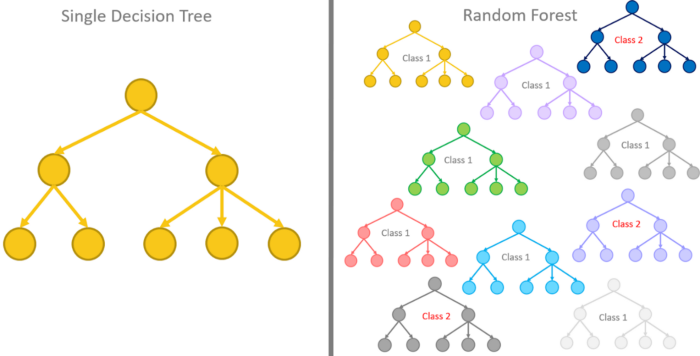

분류 모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼 특성을 선택

즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택하여 사용

다만 회귀 모델인 RandomForestRegressor는 전체 특성을 사용

사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련한다.

그 다음 분류일 때는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼는다.

회귀일 때는 단순히 각 트리의 예측을 평균함.

- 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 문제
- 회귀 : 임의의 어떤 숫자를 예측하는 문제

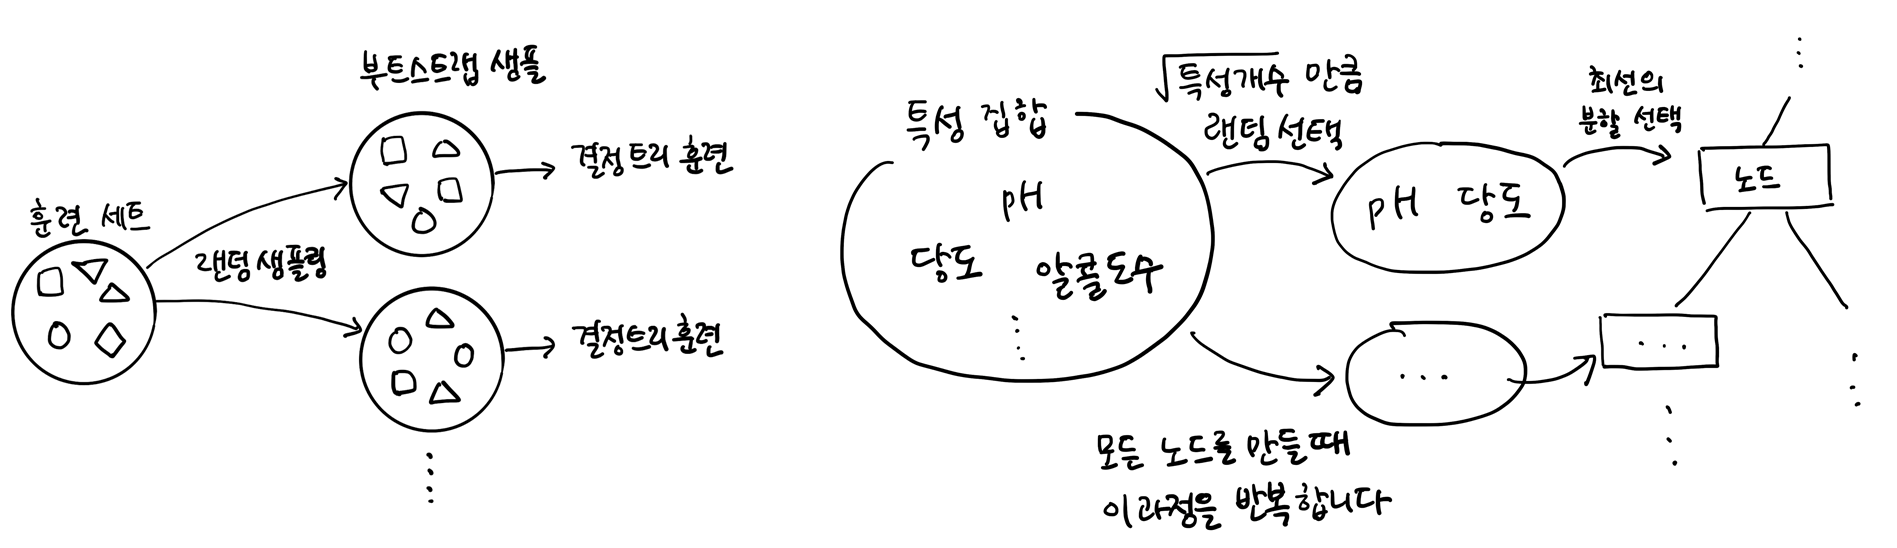

In [1]:
# 와인찾기 데이터
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [2]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [3]:
# 훈련 세트 80%와 테스트 세트 20%로 나눔
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)
# 여기서 만든 테스트 20%는 검증이 끝난 마지막 단계에서 평가용으로 사용

(5197, 3) (1300, 3)


In [4]:
from sklearn.model_selection import cross_validate      # 크로스 검증용
from sklearn.ensemble import RandomForestClassifier     # 100개의 결정트리 사용

rf = RandomForestClassifier(n_jobs=-1, random_state=42)     # n_jobs=-1 모든 cpu 사용
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
# return_train_score=True 검증 점수와 훈련 세트에 대한 점수도 리턴

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# train_score 과대적합(100개의 결정트리를 사용하기 때문에) 0.9973541965122431

0.9973541965122431 0.8905151032797809


랜덤 포레스트는 결정트리의 앙상블이기 때문에 결정트리가 제공하는 중요한 매개변수를 모두 제공함

결정트리의 큰 장점 중 하나인 특성 중요를 계산한다.

랜덤 포레스트의 특성 중요도는 각 결정트리의 특성 중요도를 취합한 것이다.

In [5]:
# 훈련 후에 중요도를 출력해보자.
rf.fit(train_input, train_target)   # 훈련 후 특성 중요도 출력
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


[0.23167441 0.50039841 0.26792718] 랜덤 포레스트 현재 결과

[0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

알콜도수 ........ 당도 ............ pH 비교해보자.

당도의 중요도가 감소하고 알콜도수와 pH 중요도가 상승함

이유는 랜덤 포레스트가 특성 일부를 랜덤하게 선택하여 결정트리를 훈련하기 때문임(중복 허용)

하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회가 됨(과대적합을 줄임)

RandomForestClassifier 기능 중에 자체적으로 모델을 평가하는 점수를 얻을 수 있다.

OOB(Out Of Bag) 부트스트랩에 포함되지 않고 남은 샘플 -> 결정 트리 평가용(검증 세트로 활용)

oob_score=True -> 랜덤 포레스트는 각 결정 트리의 OOB 점수를 평균하여 출력(oob_score_)

In [6]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)    # 교차 검증 점수와 비슷한 결과를 얻음
# OOB 점수를 사용하면 교차 검증을 대신할 수 있어 결과적으로 훈련 세트에 더 많은 샘플을 사용할 수 있음

0.8934000384837406


RandomForestClassifier 끝!

---

엑스트라 트리 : 100개의 결정 트리 훈련 -> 부트스트랩 샘플을 사용하지 않음(전체 훈련세트 사용)

대신 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아니라 무작위로 분할함!

엑스트라 트리의 결정 트리 splitter='random'

하나의 결정 트리에서 특성을 무작위로 분할한다면 성능이 낮아지겠지만 많은 트리를 앙상블 하기 때문에 과대 적합을 막고 검증세트의 점수를 높이는 효과가 있다.

In [7]:
from sklearn.ensemble import ExtraTreesClassifier   # ExtraTreesClassifier 엑스트라 트리

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# RandomForestClassifier와 결과가 비슷함. 대신 속도가 빠름

0.9974503966084433 0.8887848893166506


In [9]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


[0.20183568 0.52242907 0.27573525] 엑스트라 트리 현재 결과

[0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과

[0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

특성 중요도를 보면 결정 트리보다 당도에 대한 의존성이 작다.

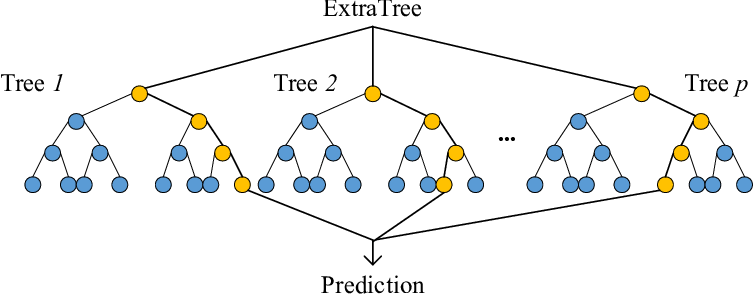

엑스트라 트리 끝!

---

그레디언트 부스팅 Gradient Boosting(기울기)

깊이가 얕은 결정트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블

사이킷런의 GradientBoostingClassifier는 기본적으로 깊이가 3인 결정트리를 100개 사용

때문에 과대적합에 강하고 일반적인 높은 일반화 성능을 기대함

Gradient는 경사 하강법을 사용하여 트리를 앙상블에 추가함.

분류 : 로지스틱 손실 함수, 회귀 : 평균 제곱 오차 함수 사용

경사 하강법 손실 함수를 산으로 정의하고 가장 낮은 곳으로 찾아내려오는 과정

가장 낮은 곳으로 내려오는 방법은 모델의 가중치와 절편을 조금씩 바꾸는 것

결정트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동, 손실함수의 낮은 곳으로 천천히 이동

In [11]:
from sklearn.ensemble import GradientBoostingClassifier     # 그레디언트 부스팅

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    # 과대 적합 해결

0.8881086892152563 0.8720430147331015


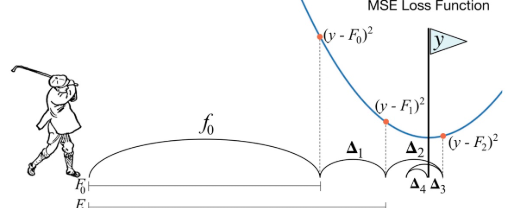

In [12]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
# n_estimators=500 결정트리 개수를 500개로 늘림. 기본값 100
# learning_rate=0.2 학습률. 기본값 0.1
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    # 교차 검증 점수 확인
# 94.64% 87.80% 훈련과 검증 점수 차이가 10%이상 나지 않으면 괜찮음 (과대적합 아님)

0.9464595437171814 0.8780082549788999


In [13]:
gb.fit(train_input, train_target)   # 훈련시작
print(gb.feature_importances_)  # 당도에 의존도가 낮음

[0.15887763 0.6799705  0.16115187]


그레디언트 부스팅이 랜덤 포레스트보다 조금 더 높은 성능이 있다.

하지만 순서대로 트리를 추가하기 때문에 훈련속도가 느리다.

GradientBoostingClassifier에는 n_jobs=-1 매개값이 없다. (구형 모델이라서)

[0.15887763 0.6799705  0.16115187] 그레이디언트 부스팅 현재 결과

[0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과

[0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과

[0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

그레디언트 부스팅 끝!

---

히스토그램 기반 그레디언트 부스팅 Histogram Gradient : 그레디언트 부스팅의 개선 버전

입력 특성을 256 구간으로 나눔 -> 노드를 분할할 때 최적의 분할을 매우 빠르게 찾을 수 있다.

특히 256구간 중에서 하나를 떼어 놓고 누락된 값을 위해서 사용함

HistGradientBoostingClassifier는 기본 매개변수에서 안정적인 성능을 얻을 수 있다.

HistGradientBoostingClassifier에는 트리의 개수를 지정하는데 n_estimators 대신 max_iter를 사용함(성능 향상용)

In [14]:
# from sklearn.experimental import enable_hist_gradient_boosting 아직 개발중
from sklearn.ensemble import HistGradientBoostingClassifier     # 분류용

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))    # 과대적합 억제 성공!

0.9321723946453317 0.8801241948619236


In [15]:
from sklearn.inspection import permutation_importance   # 특성 중요도 확인
# 특성을 하나씩 랜덤하게 섞어서 모델의 성능이 변화되는지 관찰

# 히스토그램기반의 훈련을 진행 -> 훈련세트에서 특성 중요도를 계산해보자
hgb.fit(train_input, train_target)

# n_repeats=10 랜덤하게 섞을 횟수 (기본값 5)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


알콜도수 ...... 당도 ............ pH          비교 해보자.

[0.08876275 0.23438522 0.08027708] 히스토그램 현재결과

[0.15887763 0.6799705  0.16115187] 그레이디언트 부스팅 이전 결과

[0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과

[0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과

[0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

In [16]:
# 이번에는 테스트 세트의 결과를 확인해보자.
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


알콜도수 ...... 당도 ............ pH 비교 해보자.

[0.05969231 0.20238462 0.049 ] 테스트 세트에서 특성 중요도

[0.08876275 0.23438522 0.08027708] 히스토그램 현재결과

[0.15887763 0.6799705 0.16115187] 그레이디언트 부스팅 이전 결과

[0.20183568 0.52242907 0.27573525] 엑스트라 트리 이전 결과

[0.23167441 0.50039841 0.26792718] 랜덤포레스트 이전 결과

[0.12345626 0.86862934 0.0079144 ] LogisticRegression 이전 결과

HistGradientBoostingRegressor : 히스토그램 기반 그레디언트 부스팅의 회귀 버전

히스토그램 기반 그레디언트 부스팅 끝!

---

사이킷런 말고도 그레디언트 부스팅 알고리즘을 구현한 라이브러리가 다수 존재

In [17]:
# XGBoost 대표적임 -> 크로스 검증이 가능(cross_validate())
from xgboost import XGBClassifier
# tree_method='hist' 히스토그램 기반 그레디언트 부스팅
# 만약 안되면 파이썬에 설치가 안 된 것임
# !pip install xgboost
# !pip install pycaret -> 세션 다시 시작하고 위에서부터 다시 객체 생성

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9558403027491312 0.8782000074035686


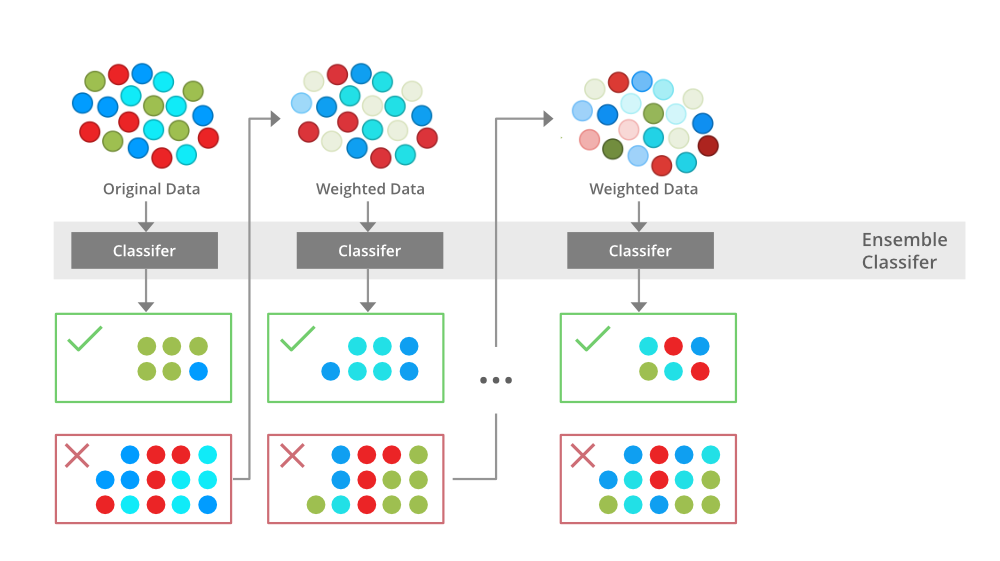

In [18]:
# LGBMClassifier ms에서 만든 LightGBM^2
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884
